## Titanic - Machine Learning from Disaster

- Description:
The sinking of a British passenger liner named "Titanic" occured in the North Atlantic Ocean on 15 April 1912, which recorded death toll of more than 1,500 out of the estimated 2,224 passengers and crew aboard.

- Task:
To build a model that predicts what sorts of people were more likely to survive from the disaster.

- Given:
891 train data and 418 test data with 12 features.

### Table of contents

1. Data scanning
    1. Check null data
    2. Check target label
2. Exploratory data analysis
    1. Pclass
    2. Sex
    3. Both-Sex and Pclass
    4. Age
    5. Pclass, Sex, Age
    6. Embarked
    7. Family - SibSp, Parch
    8. Cabin

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

c:\Users\after\miniconda3\envs\ai\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 1. Check dataset

In [2]:
df_train = pd.read_csv('input/train.csv')
df_test = pd.read_csv('input/test.csv')

In [3]:
type(df_train)

pandas.core.frame.DataFrame

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Feature description

| Feature       | Description                                       | Data type |
| :---          | :---                                              | :---      |
| Survived      | 0 (died) or 1 (survived); target label            | Integer   |
| Pclass        | 1 (1st class) to 3 (3rd class)                    | Integer   |
| Sex           | Male or Female                                    | String    |
| Age           | 0 to 80                                           | Float     |
| SibSp         | # of siblings + spouse                            | Integer   |
| Parch         | # of parent(s) + children                         | Integer   |
| Ticket        | Ticket type and number                            | String    |
| Fare          | Fare in dollars                                   | Float     |
| Cabin         | Cabin number                                      | String    |
| Embarked      | C = Cherbourg, S = Southhampton, Q = Queenstown   | String    |

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### 1.1. Null data check

In [7]:
for col in df_train.columns:
    msg = "Column: {:>12}\t Ratio of NaN value: {:>7.3f}%".format(
                    col, 100 * df_train[col].isnull().sum() / df_train[col].shape[0])
    print(msg)

Column:  PassengerId	 Ratio of NaN value:   0.000%
Column:     Survived	 Ratio of NaN value:   0.000%
Column:       Pclass	 Ratio of NaN value:   0.000%
Column:         Name	 Ratio of NaN value:   0.000%
Column:          Sex	 Ratio of NaN value:   0.000%
Column:          Age	 Ratio of NaN value:  19.865%
Column:        SibSp	 Ratio of NaN value:   0.000%
Column:        Parch	 Ratio of NaN value:   0.000%
Column:       Ticket	 Ratio of NaN value:   0.000%
Column:         Fare	 Ratio of NaN value:   0.000%
Column:        Cabin	 Ratio of NaN value:  77.104%
Column:     Embarked	 Ratio of NaN value:   0.224%


In [8]:
for col in df_test.columns:
    msg = "Column: {:>12}\t Ratio of NaN value: {:>7.3f}%".format(
                    col, 100 * df_test[col].isnull().sum() / df_test[col].shape[0])
    print(msg)

Column:  PassengerId	 Ratio of NaN value:   0.000%
Column:       Pclass	 Ratio of NaN value:   0.000%
Column:         Name	 Ratio of NaN value:   0.000%
Column:          Sex	 Ratio of NaN value:   0.000%
Column:          Age	 Ratio of NaN value:  20.574%
Column:        SibSp	 Ratio of NaN value:   0.000%
Column:        Parch	 Ratio of NaN value:   0.000%
Column:       Ticket	 Ratio of NaN value:   0.000%
Column:         Fare	 Ratio of NaN value:   0.239%
Column:        Cabin	 Ratio of NaN value:  78.230%
Column:     Embarked	 Ratio of NaN value:   0.000%


<AxesSubplot:>

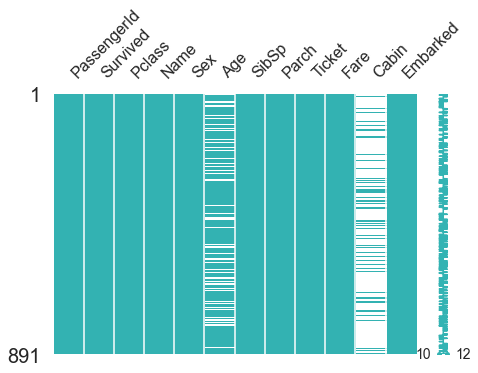

In [9]:
msno.matrix(df=df_train.iloc[:, :], figsize=(7.2, 4.8), color=(.2, .7, .7))

<AxesSubplot:>

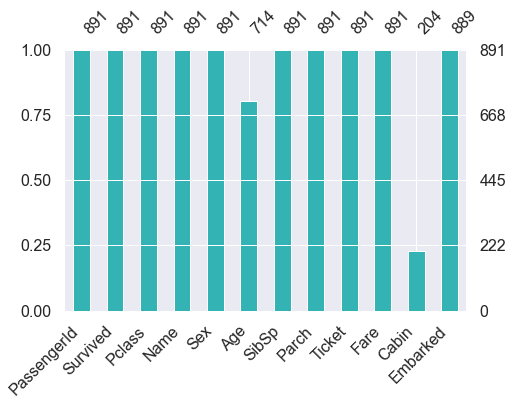

In [10]:
msno.bar(df=df_train.iloc[:, :], figsize=(7.2, 4.8), color=(.2, .7, .7))

<AxesSubplot:>

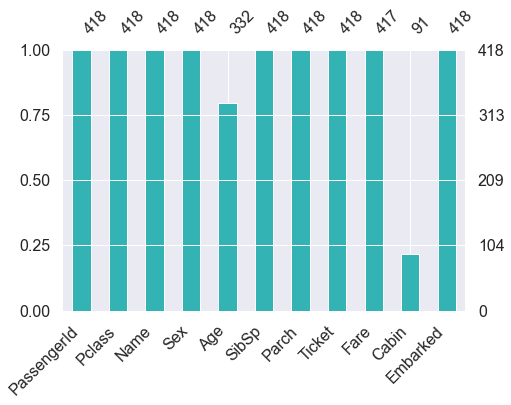

In [11]:
msno.bar(df=df_test.iloc[:, :], figsize=(7.2, 4.8), color=(.2, .7, .7))

#### 1.2. Check target label

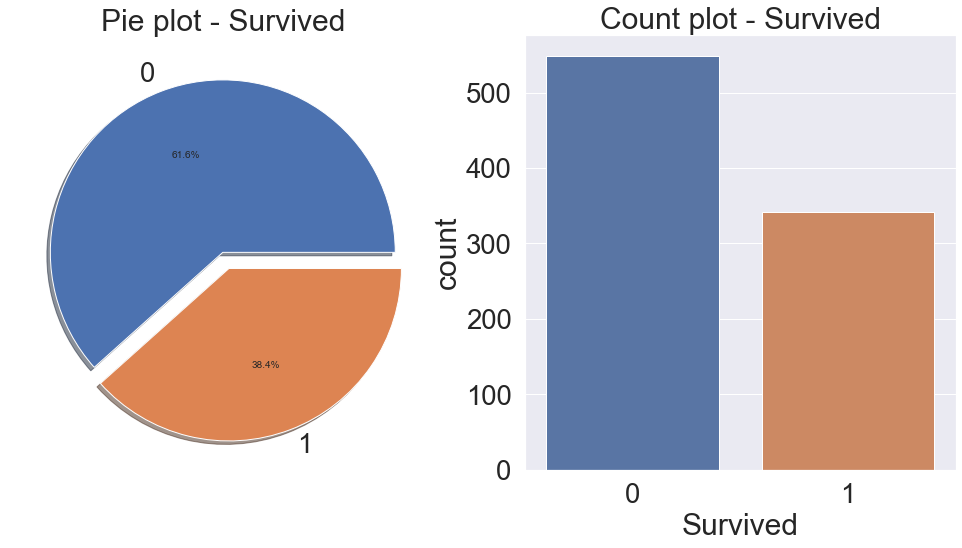

In [12]:
_, ax  = plt.subplots(1, 2, figsize=(17, 8))

df_train["Survived"].value_counts().plot.pie(explode=[0, .1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title("Pie plot - Survived")
ax[0].set_ylabel("")
sns.countplot("Survived", data=df_train, ax=ax[1])
ax[1].set_title("Count plot - Survived")

plt.show()

### 2. Exploratory Data Analysis (EDA)

#### 2.1. Pclass

In [13]:
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [14]:
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [15]:
pd.crosstab(df_train["Pclass"], df_train["Survived"], margins=True)\
  .style.background_gradient(cmap="summer_r")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

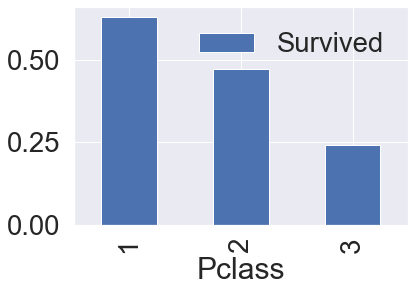

In [16]:
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()\
                                .sort_values(by="Survived", ascending=False).plot.bar()

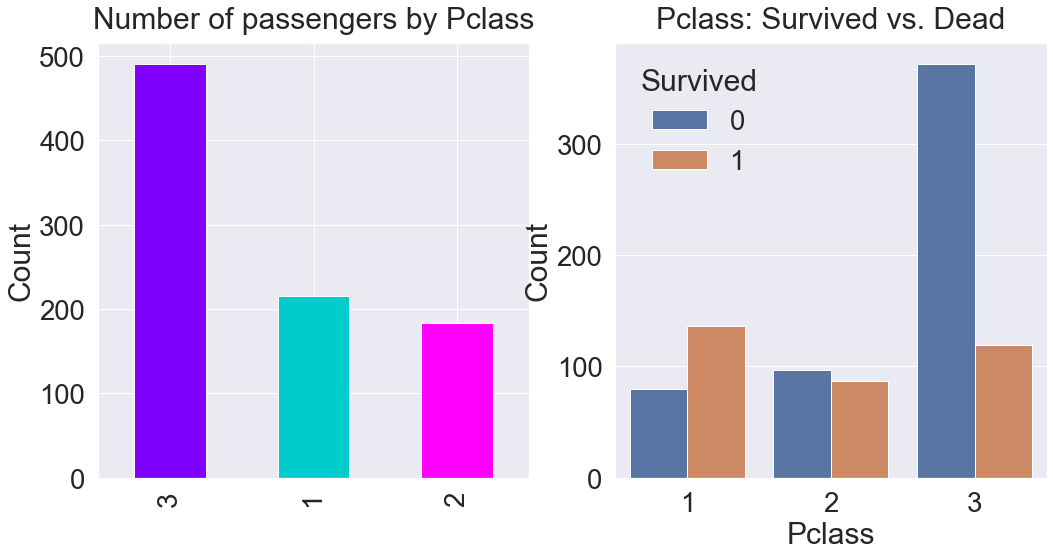

In [17]:
y_pos = 1.02
_, ax = plt.subplots(1, 2, figsize=(17, 8))
df_train["Pclass"].value_counts().plot.bar(color=["#7f00ff", "#00cccc", "#ff00ff"], ax=ax[0])
ax[0].set_title("Number of passengers by Pclass", y=y_pos)
ax[0].set_ylabel("Count")
sns.countplot("Pclass", hue="Survived", data=df_train, ax=ax[1])
ax[1].set_title("Pclass: Survived vs. Dead", y=y_pos)
ax[1].set_ylabel("Count")
plt.show()

#### 2.2. Sex

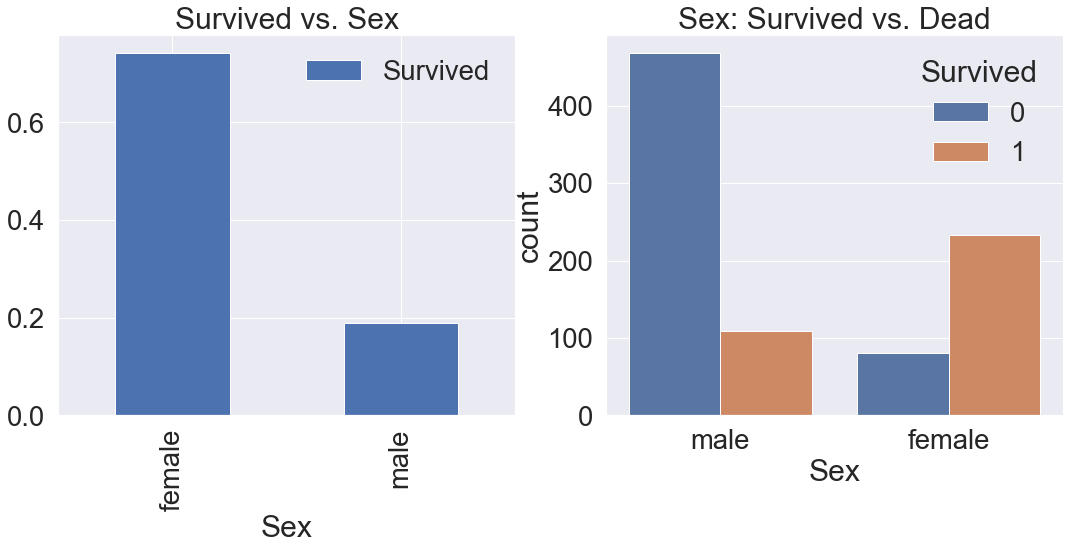

In [18]:
_, ax = plt.subplots(1, 2, figsize=(18, 7))
df_train[["Sex", "Survived"]].groupby(["Sex"], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs. Sex")
sns.countplot("Sex", hue="Survived", data=df_train, ax=ax[1])
ax[1].set_title("Sex: Survived vs. Dead")
plt.show()

In [19]:
df_train[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean()\
                             .sort_values(by="Survived", ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
pd.crosstab(df_train["Sex"], df_train["Survived"], margins=True).style\
  .background_gradient(cmap="summer_r")

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


#### 2.3. Both Sex and Pclass

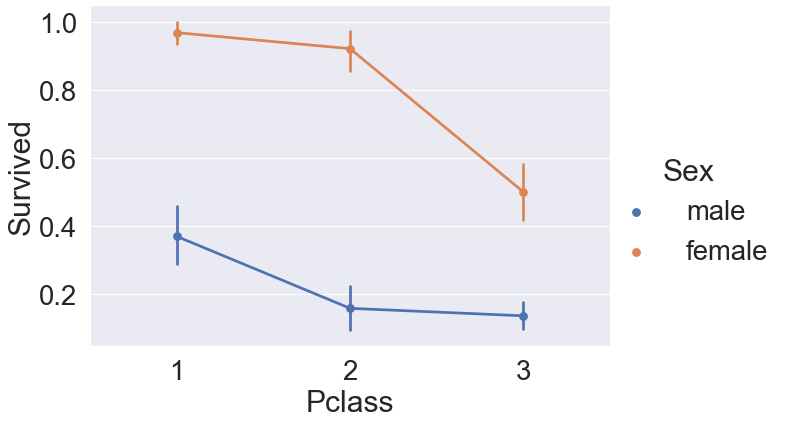

In [21]:
sns.factorplot("Pclass", "Survived", hue="Sex", data=df_train, size=6, aspect=1.5)

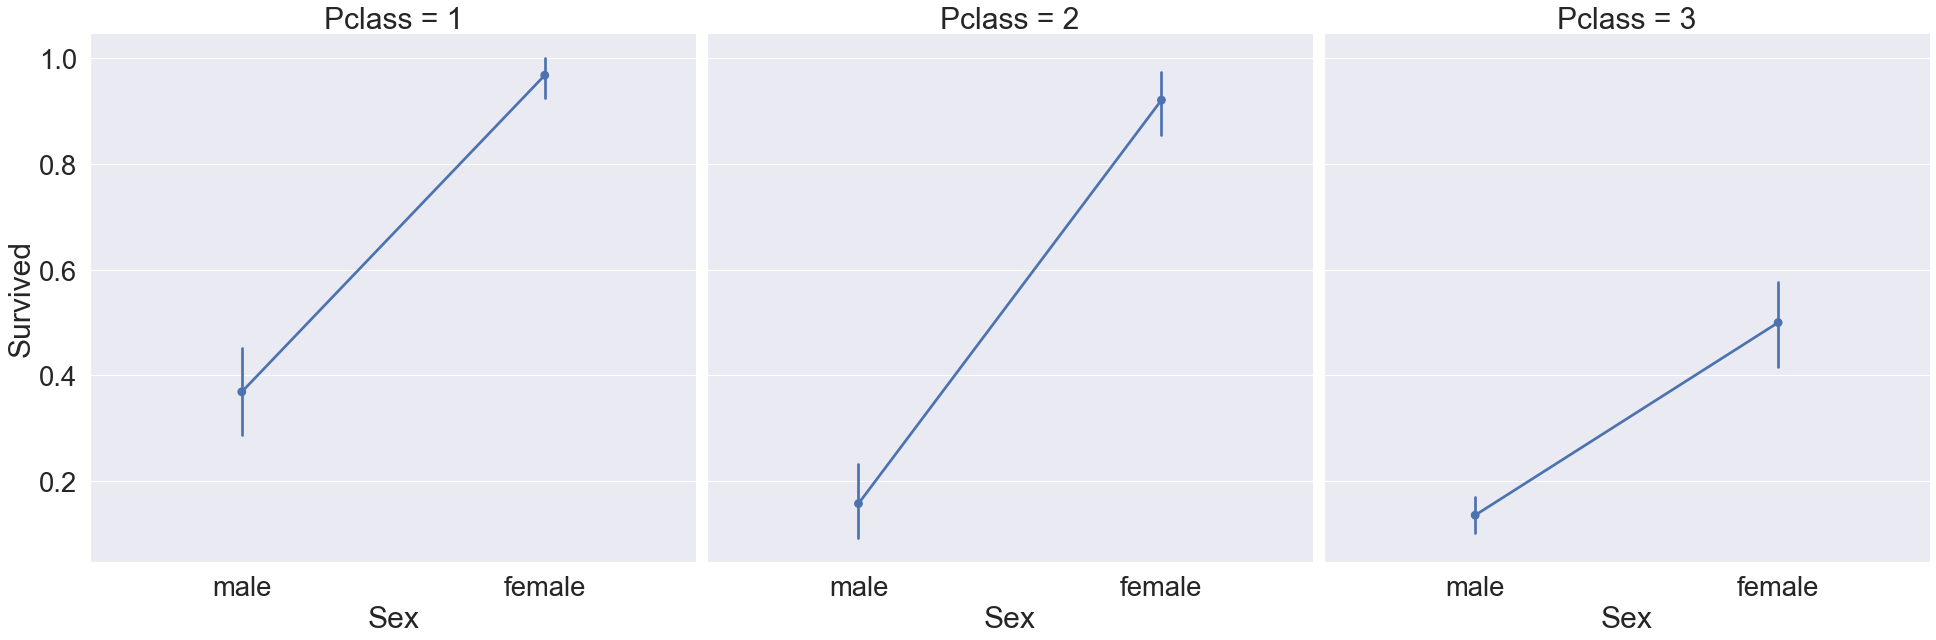

In [22]:
sns.factorplot(x="Sex", y="Survived", col="Pclass", data=df_train, saturation=.5, size=9, aspect=1)

#### 2.4. Age

In [23]:
print("The oldest passenger's age:\t\t {:>4.1f} years".format(df_train["Age"].max()))
print("The youngest passenger's age:\t\t {:>4.1f} years".format(df_train["Age"].min()))
print("The average age of all passengers:\t {:>4.1f} years".format(df_train["Age"].mean()))

The oldest passenger's age:		 80.0 years
The youngest passenger's age:		  0.4 years
The average age of all passengers:	 29.7 years


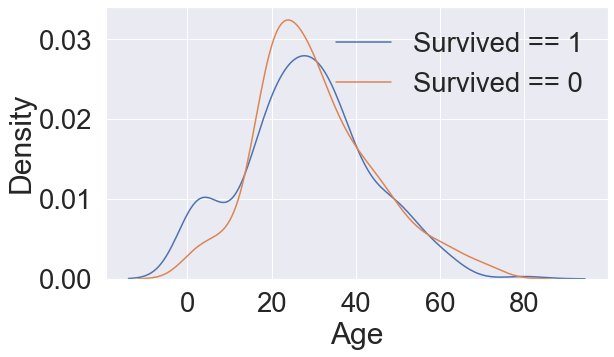

In [25]:
_, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train["Survived"] == 1]["Age"], ax=ax)
sns.kdeplot(df_train[df_train["Survived"] == 0]["Age"], ax=ax)
plt.legend(["Survived == 1", "Survived == 0"])
plt.show()

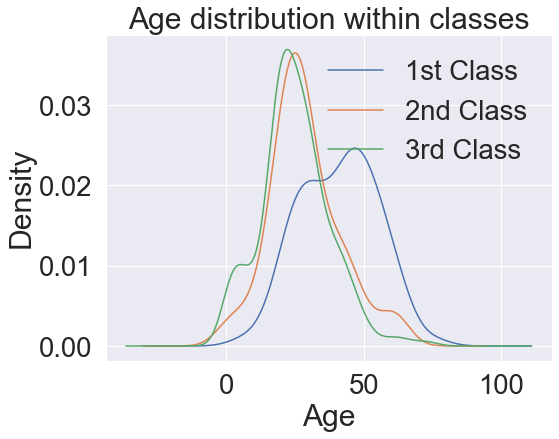

In [26]:
# Age distribution with classes
plt.figure(figsize=(8, 6))
df_test["Age"][df_test["Pclass"] == 1].plot(kind="kde")
df_test["Age"][df_test["Pclass"] == 2].plot(kind="kde")
df_train["Age"][df_train["Pclass"] == 3].plot(kind="kde")

plt.xlabel("Age")
plt.title("Age distribution within classes")
plt.legend(["1st Class", "2nd Class", "3rd Class"])

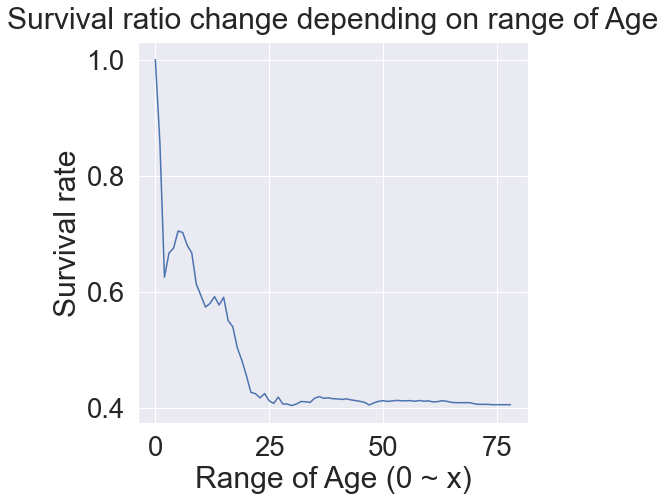

In [27]:
cummulate_survival_ratio = [df_train[df_train["Age"] < i]["Survived"].sum()\
                            / len(df_train[df_train["Age"] < i]["Survived"])\
                            for i in range(1, 80)]

plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title("Survival ratio change depending on range of Age", y=1.02)
plt.ylabel("Survival rate")
plt.xlabel("Range of Age (0 ~ x)")
plt.show()

#### 2.5. Pclass, Sex, Age

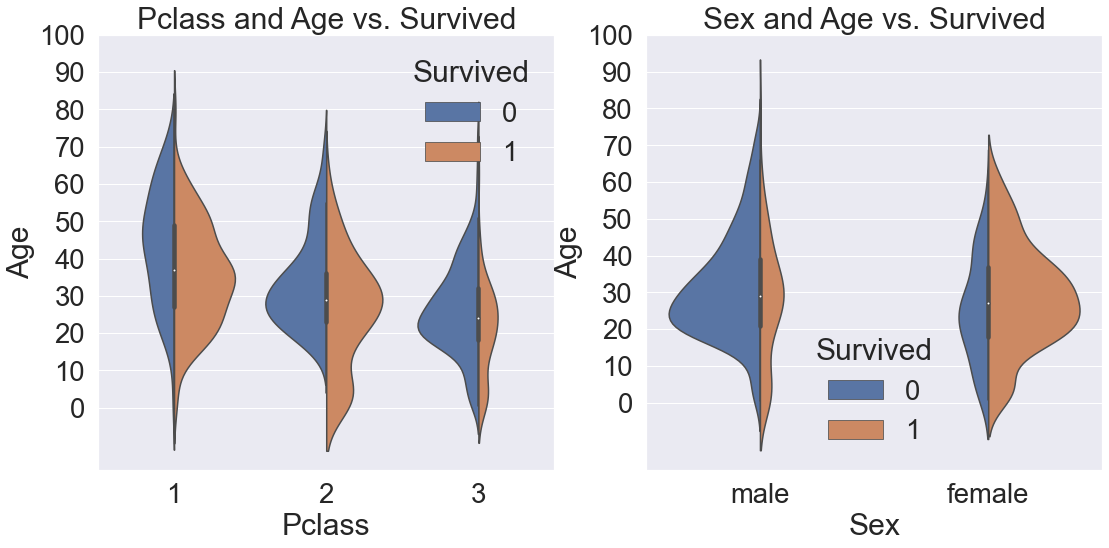

In [28]:
_, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=df_train, scale="count", split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs. Survived")
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue="Survived", data=df_train, scale="count", split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs. Survived")
ax[1].set_yticks(range(0, 110, 10))
plt.show()

#### 2.6. Embarked

<AxesSubplot:xlabel='Embarked'>

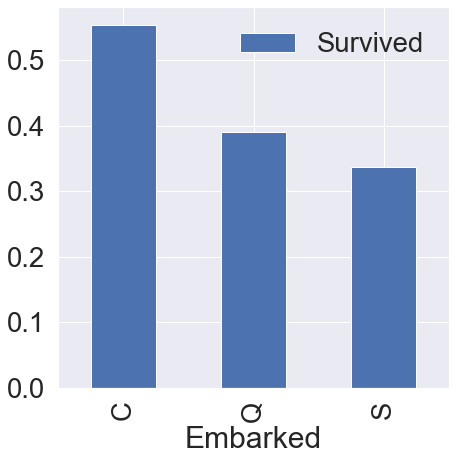

In [29]:
_, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[["Embarked", "Survived"]].groupby(["Embarked"], as_index=True).mean()\
                                  .sort_values(by="Survived", ascending=False)\
                                  .plot.bar(ax=ax)

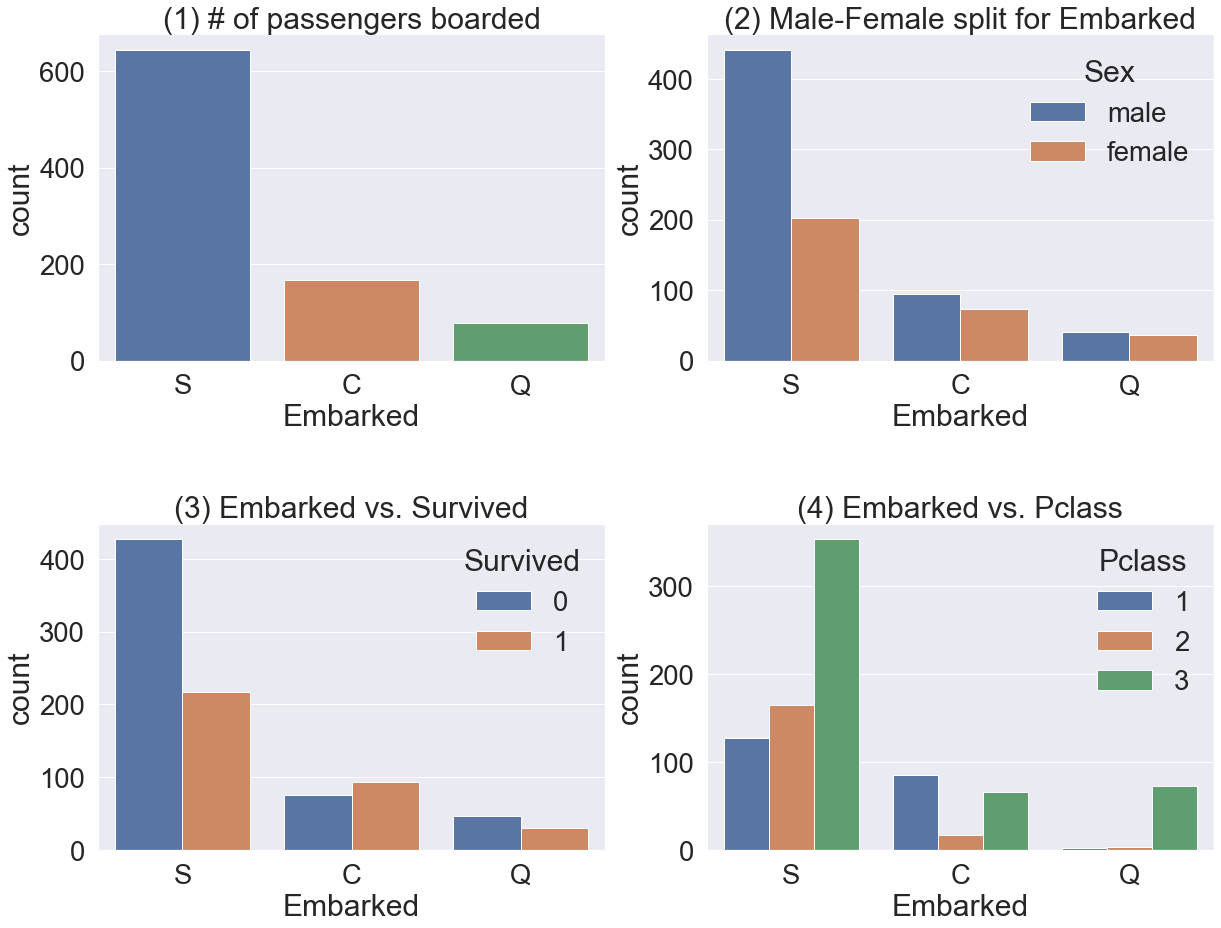

In [30]:
_, ax = plt.subplots(2, 2, figsize=(20, 15))
sns.countplot("Embarked", data=df_train, ax=ax[0, 0])
ax[0, 0].set_title("(1) # of passengers boarded")
sns.countplot("Embarked", hue="Sex", data=df_train, ax=ax[0, 1])
ax[0, 1].set_title("(2) Male-Female split for Embarked")
sns.countplot("Embarked", hue="Survived", data=df_train, ax=ax[1, 0])
ax[1, 0].set_title("(3) Embarked vs. Survived")
sns.countplot("Embarked", hue="Pclass", data=df_train, ax=ax[1, 1])
ax[1, 1].set_title("(4) Embarked vs. Pclass")
plt.subplots_adjust(wspace=.2, hspace=.5)
plt.show()

#### 2.7. Family - SibSp (sibling(s) + spouse) + Parch (parent(s) + child(ren))

In [31]:
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1 # +1 for self
df_test["FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1

In [32]:
print("Maximum size of family: {:>3d}".format(df_train["FamilySize"].max()))
print("Maximum size of family: {:>3d}".format(df_train["FamilySize"].min()))

Maximum size of family:  11
Maximum size of family:   1


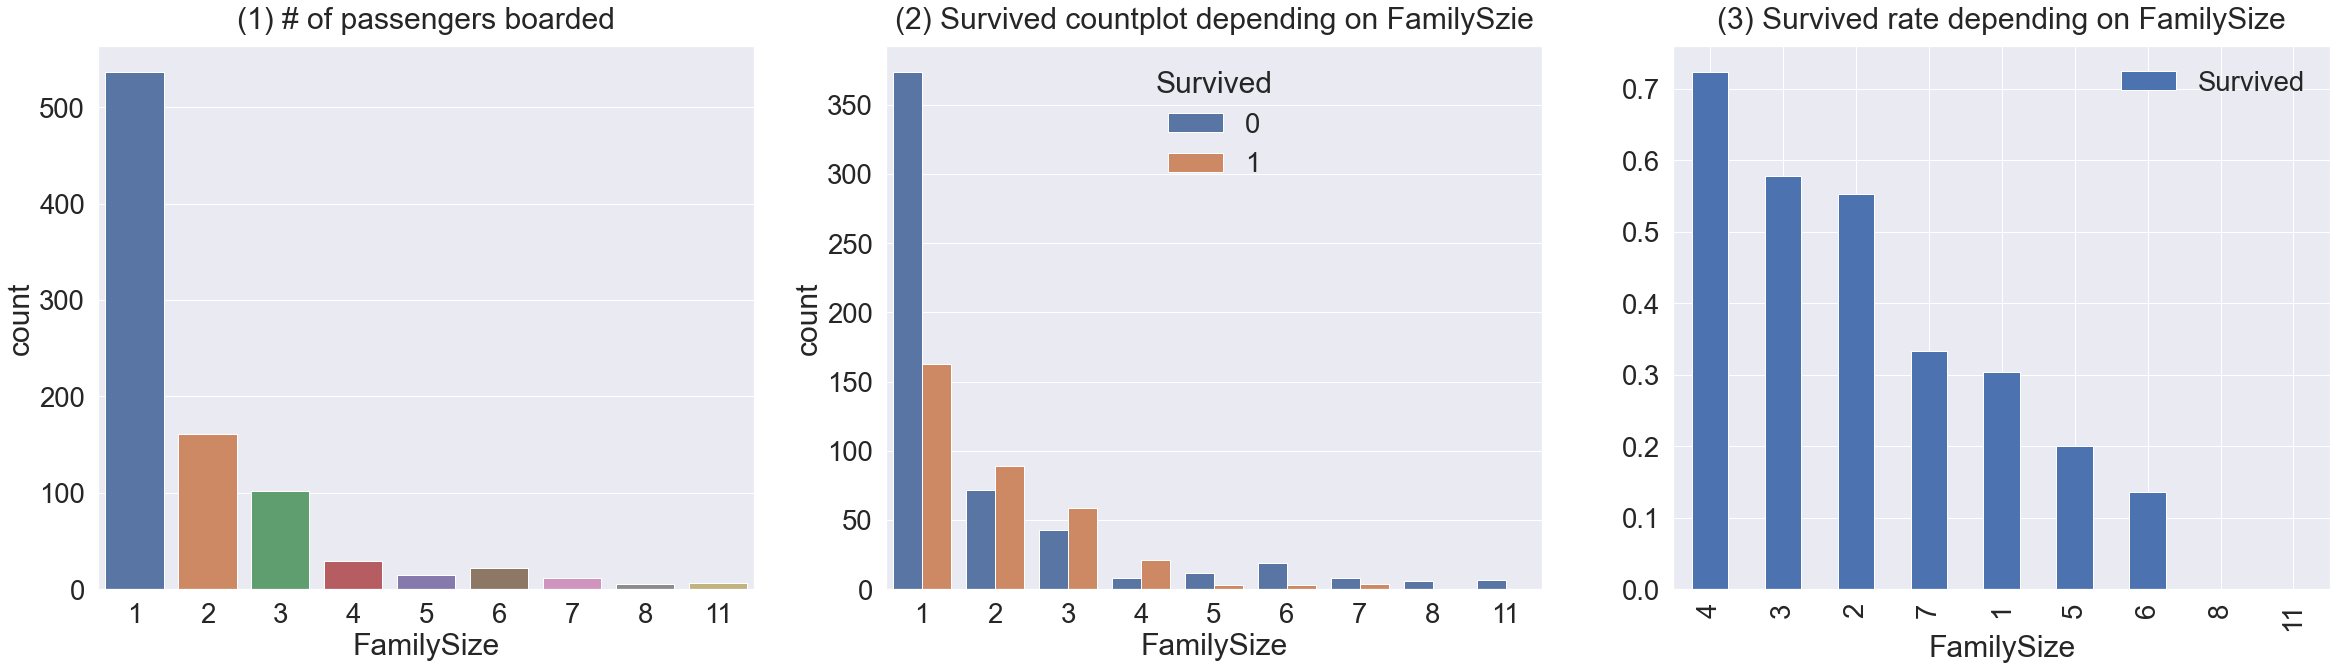

In [33]:
_, ax = plt.subplots(1, 3, figsize=(40, 10))
sns.countplot("FamilySize", data=df_train, ax=ax[0])
ax[0].set_title("(1) # of passengers boarded", y=1.02)
sns.countplot("FamilySize", hue="Survived", data=df_train, ax=ax[1])
ax[1].set_title("(2) Survived countplot depending on FamilySzie", y=1.02)
df_train[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=True).mean()\
                                    .sort_values(by="Survived", ascending=False)\
                                    .plot.bar(ax=ax[2])
ax[2].set_title("(3) Survived rate depending on FamilySize", y=1.02)

plt.subplots_adjust(wspace=.2, hspace=.5)
plt.show()

#### 2.8. Fare

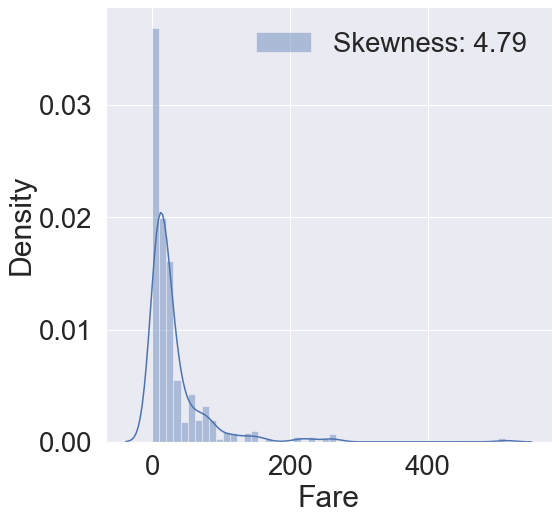

In [34]:
_, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train["Fare"], color="b", label="Skewness: {:.2f}"\
                .format(df_train["Fare"].skew()), ax=ax)
g = g.legend(loc="best")

In [35]:
df_test.loc[df_test.Fare.isnull(), "Fare"] = df_test["Fare"].mean()
df_train["Fare"] = df_train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
df_test["Fare"] = df_test["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

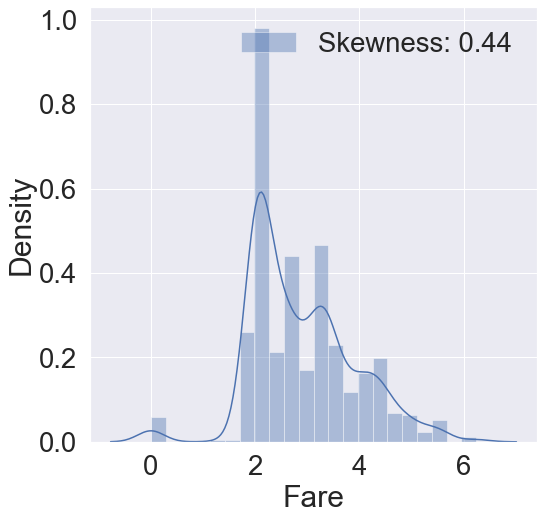

In [36]:
_, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train["Fare"], color="b", label="Skewness: {:.2f}"\
                .format(df_train["Fare"].skew()), ax=ax)
g = g.legend(loc="best")

#### 2.9. Cabin

In [37]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


#### 2.10. Ticket

In [38]:
df_train["Ticket"].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

### 3. Feature Engineering

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
from pandas import Series

py.init_notebook_mode(connected=True)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [40]:
df_train = pd.read_csv("input/train.csv")
df_test = pd.read_csv("input/test.csv")
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1
df_test["FamilySize"] = df_test["SibSp"] + df_test["Parch"] + 1

df_test.loc[df_test.Fare.isnull(), "Fare"] = df_test["Fare"].mean()
df_train["Fare"] = df_train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
df_test["Fare"] = df_test["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

#### 3.1. Fill Null

3.1.1. Fill Null in Age using title

In [41]:
df_train["Initial"] = df_train.Name.str.extract("([A-Za-z]+)\.")
df_test["Initial"] = df_test.Name.str.extract("([A-Za-z]+)\.")

In [42]:
pd.crosstab(df_train["Initial"], df_train["Sex"]).T.style.background_gradient(cmap="summer_r")

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [43]:
df_train["Initial"].replace(["Mlle", "Mme", "Ms", "Dr", "Major",\
                             "Lady", "Countess", "Jonkheer", "Col", "Rev",\
                             "Capt", "Sir", "Don", "Dona"],
                             ["Miss", "Miss", "Miss", "Mr", "Mr",\
                             "Mrs", "Mrs", "Other", "Other", "Other",\
                             "Mr", "Mr", "Mr", "Mr"], inplace=True)
df_test["Initial"].replace(["Mlle", "Mme", "Ms", "Dr", "Major",\
                            "Lady", "Countess", "Jonkheer", "Col", "Rev",\
                            "Capt", "Sir", "Don", "Dona"],
                           ["Miss", "Miss", "Miss", "Mr", "Mr",\
                             "Mrs", "Mrs", "Other", "Other", "Other",\
                             "Mr", "Mr", "Mr", "Mr"], inplace=True)

In [44]:
df_train.groupby("Initial").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Initial'>

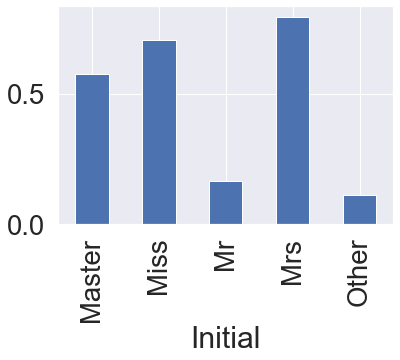

In [45]:
df_train.groupby("Initial")["Survived"].mean().plot.bar()

In [46]:
df_train.groupby("Initial").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [47]:
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=="Mr"), "Age"] = 33
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=="Mrs"), "Age"] = 36
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=="Master"), "Age"] = 5
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=="Miss"), "Age"] = 22
df_train.loc[(df_train.Age.isnull()) & (df_train.Initial=="Other"), "Age"] = 46

df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=="Mr"), "Age"] = 33
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=="Mrs"), "Age"] = 36
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=="Master"), "Age"] = 5
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=="Miss"), "Age"] = 22
df_test.loc[(df_test.Age.isnull()) & (df_test.Initial=="Other"), "Age"] = 46

##### 3.1.2. Fill Null in Embarked

In [48]:
print("Embarked has", sum(df_train["Embarked"].isnull()), "Null values")

Embarked has 2 Null values


In [49]:
df_train["Embarked"].fillna("S", inplace=True)

In [50]:
df_train["Age_cat"] = 0
df_train.loc[df_train["Age"] < 10, "Age_cat"] = 0
df_train.loc[(10 <= df_train["Age"]) & (df_train["Age"] < 20), "Age_cat"] = 1
df_train.loc[(20 <= df_train["Age"]) & (df_train["Age"] < 30), "Age_cat"] = 2
df_train.loc[(30 <= df_train["Age"]) & (df_train["Age"] < 40), "Age_cat"] = 3
df_train.loc[(40 <= df_train["Age"]) & (df_train["Age"] < 50), "Age_cat"] = 4
df_train.loc[(50 <= df_train["Age"]) & (df_train["Age"] < 60), "Age_cat"] = 5
df_train.loc[(60 <= df_train["Age"]) & (df_train["Age"] < 70), "Age_cat"] = 6
df_train.loc[70 <= df_train["Age"], "Age_cat"] = 7

df_test["Age_cat"] = 0
df_test.loc[df_test["Age"] < 10, "Age_cat"] = 0
df_test.loc[(10 <= df_test["Age"]) & (df_test["Age"] < 20), "Age_cat"] = 1
df_test.loc[(20 <= df_test["Age"]) & (df_test["Age"] < 30), "Age_cat"] = 2
df_test.loc[(30 <= df_test["Age"]) & (df_test["Age"] < 40), "Age_cat"] = 3
df_test.loc[(40 <= df_test["Age"]) & (df_test["Age"] < 50), "Age_cat"] = 4
df_test.loc[(50 <= df_test["Age"]) & (df_test["Age"] < 60), "Age_cat"] = 5
df_test.loc[(60 <= df_test["Age"]) & (df_test["Age"] < 70), "Age_cat"] = 6
df_test.loc[70 <= df_test["Age"], "Age_cat"] = 7

In [51]:
def category_age(x):
    if x < 10: return 0
    elif x < 20: return 1
    elif x < 30: return 2
    elif x < 40: return 3
    elif x < 50: return 4
    elif x < 60: return 5
    elif x < 70: return 6
    else: return 7

df_train["Age_cat_2"] = df_train["Age"].apply(category_age)

In [52]:
print("Assert that the first and second methods give the same results:",\
      (df_train["Age_cat"] == df_train["Age_cat_2"]).all())

Assert that the first and second methods give the same results: True


In [53]:
df_train.drop(["Age", "Age_cat_2"], axis=1, inplace=True)
df_test.drop(["Age"], axis=1, inplace=True)

#### 3.3. Change Initial, Embarked and Sex (string to numerical)

In [54]:
df_train["Initial"] = df_train["Initial"].map({"Master": 0, "Miss": 1, "Mr": 2, "Mrs":3, "Other": 4})
df_test["Initial"] = df_test["Initial"].map({"Master": 0, "Miss": 1, "Mr": 2, "Mrs":3, "Other": 4})

In [55]:
df_train["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [56]:
df_train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [57]:
df_train["Embarked"] = df_train["Embarked"].map({"C": 0, "Q": 1, "S": 2})
df_test["Embarked"] = df_test["Embarked"].map({"C": 0, "Q": 1, "S": 2})

In [58]:
df_train["Embarked"].isnull().any()

False

In [59]:
df_train["Sex"] = df_train["Sex"].map({"female": 0, "male": 1})
df_test["Sex"] = df_test["Sex"].map({"female": 0, "male": 1})

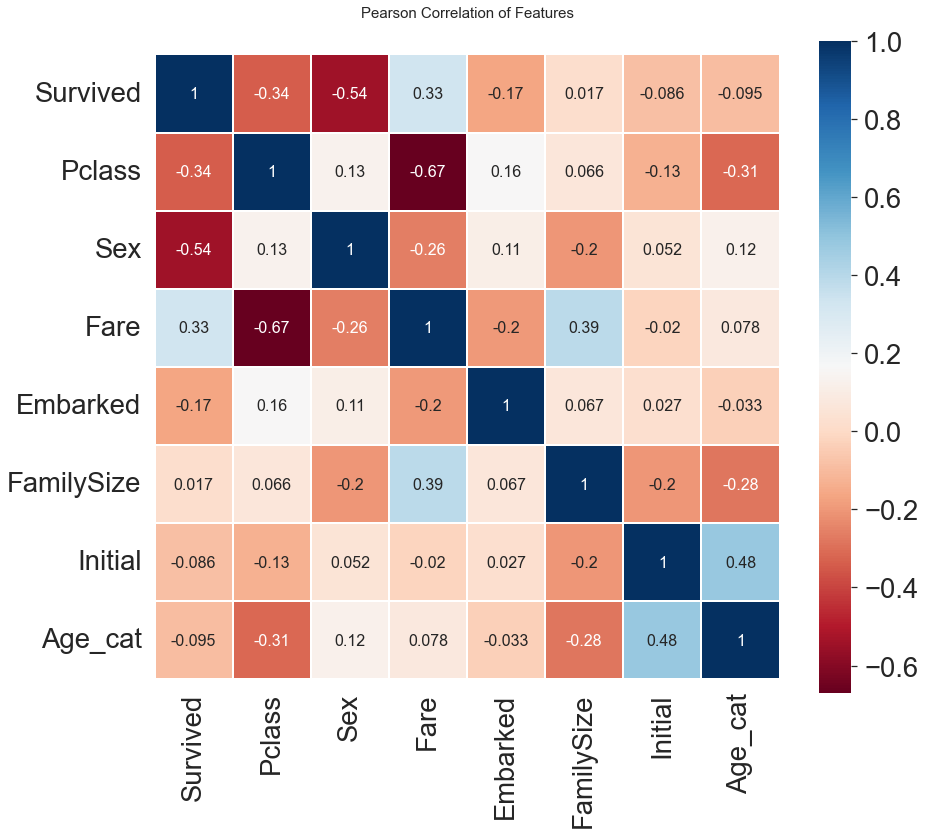

In [61]:
heatmap_data = df_train[["Survived", "Pclass", "Sex", "Fare",\
                         "Embarked", "FamilySize", "Initial", "Age_cat"]]
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title("Pearson Correlation of Features", y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=.1, vmax=1., square=True,\
                                cmap=colormap, linecolor="white", annot=True, annot_kws={"size": 16})

del heatmap_data

#### 3.4. One-hot encoding on Initial and Embarked

In [62]:
df_train = pd.get_dummies(df_train, columns=["Initial"], prefix="Initial")
df_test = pd.get_dummies(df_test, columns=["Initial"], prefix="Initial")

In [63]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [64]:
df_train = pd.get_dummies(df_train, columns=["Embarked"], prefix="Embarked")
df_test = pd.get_dummies(df_test, columns=["Embarked"], prefix="Embarked")

#### 3.5. Drop columns

In [65]:
df_train.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin"], axis=1, inplace=True)
df_test.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin"], axis=1, inplace=True)

In [66]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [67]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


### 4. Build machine learning model and prediction using the trained model

In [68]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#### 4.1. Preparation - Split dataset into train, valid, test set

In [70]:
X_train = df_train.drop("Survived", axis=1).values
y_train = df_train["Survived"].values
X_test = df_test.values

In [73]:
X_tr, X_vld, y_tr, y_vld =\
    train_test_split(X_train, y_train, test_size=.3, random_state=2018)

#### 4.2. Model preparation and prediction

In [74]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [75]:
print("Correct prediction of survival out of {} people by accuracy {:.2f}%"\
        .format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

Correct prediction of survival out of 268 people by accuracy 82.46%


#### 4.3. Feature importance

In [76]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

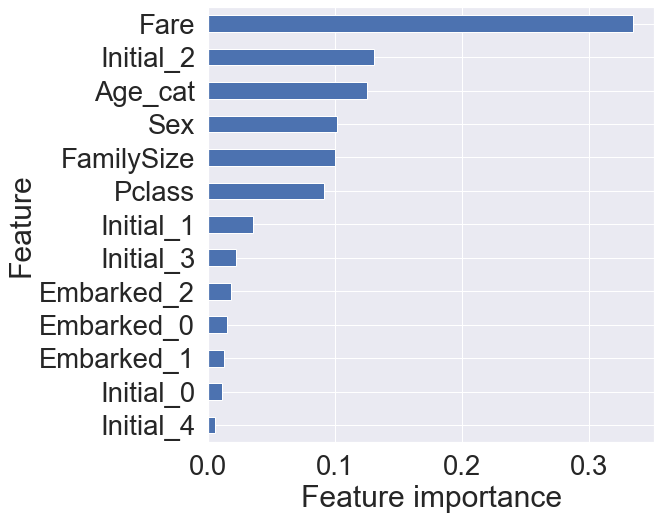

In [77]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#### 4.4. Prediction on Test Set

In [78]:
submission = pd.read_csv("input/gender_submission.csv")

In [79]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [80]:
prediction = model.predict(X_test)
submission["Survived"] = prediction

In [82]:
submission.to_csv("submission/titanic_submission_v1.csv", index=False)

#### References

[Titanic (wikipedia)](en.wikipedia.org/wiki/Titanic)

[Titanic tutorial 1 by 이유한](https://kaggle-kr.tistory.com/17?category=868316)

[Titanic tutorial 2 by 이유한](https://kaggle-kr.tistory.com/18?category=868316)